<a href="https://colab.research.google.com/github/YUCAVALCANTE/IA_PUC/blob/master/Aula1_MobilePrice_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INICIALIZAÇÃO

In [2]:
#para conectar ao Drive
from google.colab import drive # Carrega biblioteca para montar e carregar drive
drive.mount('/content/drive') # Esse código pedirá autenticação


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_
Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("/content/drive/My Drive/#coloque o seu endereço")


In [4]:
!ls 

Aula1_RN.ipynb	BreastCancer.csv  draw_neural_net.py  mobile.csv  __pycache__


### Importacao de bibliotecas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Carregar a base e visualizar primeiras linhas
df1 = pd.read_csv('mobile.csv', header=0)  #header=-1 indica que não há linha de header
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
#dimnesões da base
df1.shape

(2000, 21)

### Indicando qual coluna será rotulada (label)

In [8]:
#tipos das colunas
df1.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [9]:
#conversão da coluna da classe em categórico
df1['price_range'] = df1['price_range'].astype('category')
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
#tipo da classe após a conversão
df1['price_range'].dtypes

CategoricalDtype(categories=[0, 1, 2, 3], ordered=False)

### Indicar a semente inicial e para divisão da base em treino e teste

In [0]:
import random
np.random.seed(0) #semente inicial
nlinhas = df1.shape[0]

In [0]:
from sklearn.model_selection import train_test_split #30%para teste (0.3)
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:,df1.columns != 'price_range'], df1['price_range'], test_size=0.3)

In [13]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1719,833,1,0.6,1,0,1,27,0.3,145,4,2,649,1290,586,19,8,19,1,0,1
1702,1424,1,2.9,1,0,0,20,0.6,180,5,0,181,1199,2658,15,0,19,1,0,0
1287,860,1,1.3,1,1,1,49,0.7,141,6,13,692,979,3869,16,14,20,1,1,1
482,1330,1,1.3,1,14,0,3,0.3,83,5,17,980,1262,463,14,6,11,0,0,1
768,1149,1,2.2,0,4,0,30,0.2,106,6,5,1617,1675,3755,17,14,8,1,0,0


In [14]:
x_train.shape #numero de lista que fora do teste

(1400, 20)

In [15]:
x_test.shape #numero de lista que entrou no teste

(600, 20)

In [16]:
# alguns dados estatisticos por atributo
x_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1234.733571,0.494286,1.550214,0.514286,4.202143,0.523571,31.820000,0.504429,139.458571,4.516429,9.806429,659.709286,1264.751429,2102.074286,12.314286,5.838571,10.980714,0.764286,0.493571,0.509286
std,442.140136,0.500146,0.815758,0.499974,4.306668,0.499623,18.373277,0.288538,35.323154,2.273574,6.058362,444.851864,430.891660,1073.457393,4.163365,4.411914,5.491333,0.424596,0.500137,0.500092
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,840.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,108.000000,3.000000,4.750000,295.750000,886.750000,1203.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1224.000000,0.000000,1.500000,1.000000,3.000000,1.000000,31.000000,0.500000,140.000000,4.000000,10.000000,589.500000,1263.000000,2105.000000,12.000000,5.000000,11.000000,1.000000,0.000000,1.000000
75%,1610.250000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,169.250000,7.000000,15.000000,964.000000,1641.000000,2978.750000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [17]:
y_train.head()

1719    0
1702    2
1287    3
482     0
768     3
Name: price_range, dtype: category
Categories (4, int64): [0, 1, 2, 3]

## Análise exploratória

### Dispersão

#### Visualização RAM x INT_MEMORY (Internal Memory in Gigabytes) e cores comos as classes de saída (PRICE_RANGE)

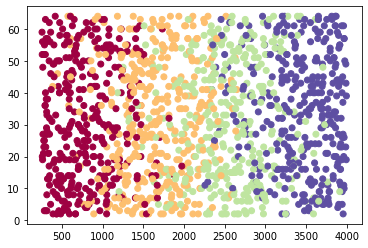

In [18]:
plt.scatter(x_train['ram'], x_train['int_memory'], c=y_train, cmap=plt.cm.Spectral)
plt.show()

#### Visualização PRICE_RANGE x BATTERY_POWER e cores comos as classes de saída (PRICE_RANGE)

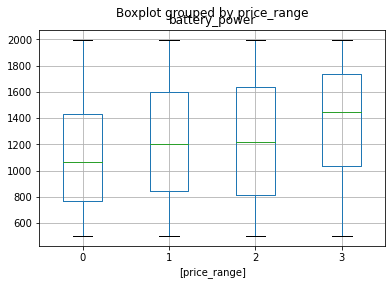

In [19]:
df1.boxplot(column=['battery_power'], by=['price_range'])

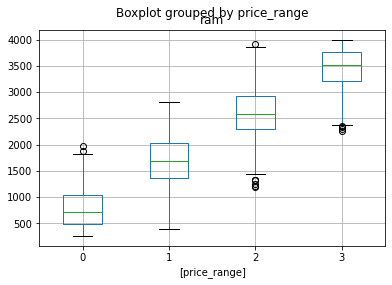

In [21]:
df1.boxplot(column = ['ram'], by= ['price_range'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


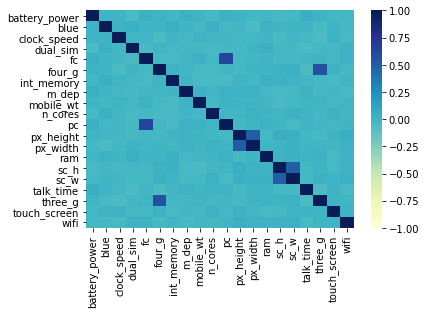

In [22]:
#análise de correlação
import seaborn as sns
corr = df1.corr()
sns.heatmap(corr,cmap='YlGnBu',vmin=-1,vmax=1)

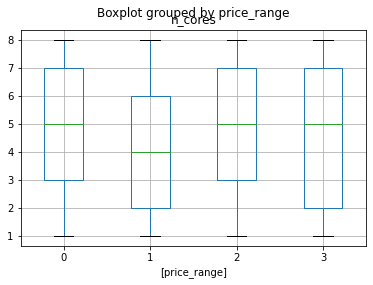

In [23]:
df1.boxplot(column = ['n_cores'], by= ['price_range'])

## **Normalizando os Dados**

In [0]:
#normalizou o teste = base
#diminui a media divide pelo desvio padrao
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(x_train)

In [0]:
X_train_normalized = preprocessParams.transform(x_train)
X_test_normalized = preprocessParams.transform(x_test)

In [0]:
#coversão em dataframe
X_train_normalized = pd.DataFrame(X_train_normalized, columns = x_train.columns.values)
X_test_normalized = pd.DataFrame(X_test_normalized, columns = x_test.columns.values)

In [27]:
X_train_normalized.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.908936,1.011495,-1.165240,0.971825,-0.976078,0.953918,-0.262431,-0.708751,0.156934,-0.227225,-1.288998,-0.024082,0.058617,-1.412833,1.606418,0.490082,1.460875,0.555348,-0.987224,0.981598
1,0.428222,1.011495,1.655231,0.971825,-0.976078,-1.048308,-0.643556,0.331345,1.148140,0.212768,-1.619239,-1.076494,-0.152648,0.518068,0.645313,-1.323838,1.460875,0.555348,-0.987224,-1.018747
2,-0.847848,1.011495,-0.306836,0.971825,-0.743797,0.953918,0.935388,0.678044,0.043654,0.652762,0.527323,0.072614,-0.663400,1.646602,0.885589,1.850522,1.643045,0.555348,1.012941,0.981598
3,0.215544,1.011495,-0.306836,0.971825,2.275857,-1.048308,-1.569143,-0.708751,-1.598916,0.212768,1.187803,0.720251,-0.006388,-1.527457,0.405037,0.036602,0.003513,-1.800673,-0.987224,0.981598
4,-0.193975,1.011495,0.796827,-1.028992,-0.046954,-1.048308,-0.099092,-1.055450,-0.947552,0.652762,-0.793638,2.152700,0.952432,1.540365,1.125865,1.850522,-0.542997,0.555348,-0.987224,-1.018747


In [28]:
# alguns dados estatisticos por atributo apos normalizar
X_train_normalized.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03,1.400000e+03
mean,7.295751e-17,3.703387e-16,-1.035679e-16,6.248970e-17,-5.900042e-17,1.509903e-16,8.822308e-18,-1.432188e-16,3.225991e-16,1.744636e-18,1.335440e-16,1.615375e-16,1.906412e-16,-1.671679e-16,-1.562242e-16,-1.795389e-16,1.329096e-16,2.310850e-16,8.326673e-18,1.552726e-16
std,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00,1.000357e+00
min,-1.660098e+00,-9.886360e-01,-1.287869e+00,-1.028992e+00,-9.760782e-01,-1.048308e+00,-1.623589e+00,-1.402149e+00,-1.683876e+00,-1.547205e+00,-1.619239e+00,-1.483516e+00,-1.775446e+00,-1.720361e+00,-1.757449e+00,-1.323838e+00,-1.636019e+00,-1.800673e+00,-9.872245e-01,-1.018747e+00
25%,-8.930983e-01,-9.886360e-01,-1.042611e+00,-1.028992e+00,-7.437971e-01,-1.048308e+00,-8.613408e-01,-1.055450e+00,-8.909117e-01,-6.672186e-01,-8.349180e-01,-8.184507e-01,-8.775675e-01,-8.371504e-01,-7.963439e-01,-8.703576e-01,-9.073378e-01,5.553478e-01,-9.872245e-01,-1.018747e+00
50%,-2.428508e-02,-9.886360e-01,-6.157737e-02,9.718253e-01,-2.792350e-01,9.539177e-01,-4.464598e-02,-1.535380e-02,1.533334e-02,-2.272252e-01,3.196253e-02,-1.578826e-01,-4.066114e-03,2.726480e-03,-7.551537e-02,-1.901377e-01,3.513283e-03,5.553478e-01,-9.872245e-01,9.815979e-01
75%,8.496189e-01,1.011495e+00,9.194561e-01,9.718253e-01,6.498892e-01,9.539177e-01,8.809415e-01,1.024742e+00,8.436980e-01,1.092755e+00,8.575631e-01,6.842715e-01,8.734980e-01,8.169761e-01,8.855893e-01,7.168222e-01,9.143644e-01,5.553478e-01,1.012941e+00,9.815979e-01
max,1.726917e+00,1.011495e+00,1.777860e+00,9.718253e-01,3.437262e+00,9.539177e-01,1.752083e+00,1.718140e+00,1.714543e+00,1.532748e+00,1.683164e+00,2.924019e+00,1.702309e+00,1.766817e+00,1.606418e+00,2.757482e+00,1.643045e+00,5.553478e-01,1.012941e+00,9.815979e-01


## Construção de uma Rede Neural

In [0]:
#importa a rede neural
from draw_neural_net import *

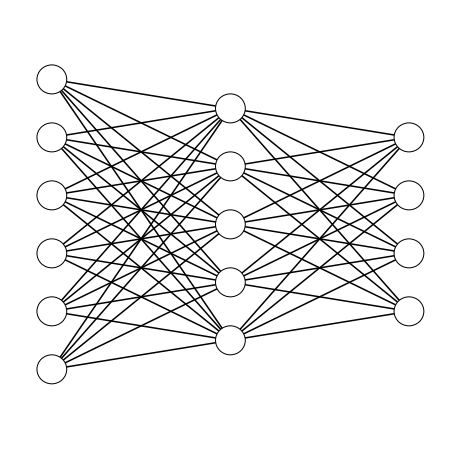

In [30]:
# Simplesmente para visualização
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [6, 5, 4])

In [31]:
#biblioteca keras
from keras import Model, Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
numClasses = len(y_train.values.categories)

In [33]:
#criar arquitetura da rede neural
RN = Sequential()
RN.add(Dense(12,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(numClasses,activation = 'sigmoid'))
RN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 52        
Total params: 304
Trainable params: 304
Non-trainable params: 0
_________________________________________________________________


In [34]:
#treinando a rede 
from keras.utils import to_categorical
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9)
RN.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['accuracy'])
trainedRN = RN.fit(X_train_normalized,to_categorical(y_train),
                            epochs = 100, verbose = 1)


Epoch 1/100
1400/1400 [==============================] - 0s 175us/step - loss: 0.2144 - accuracy: 0.2650
Epoch 2/100
1400/1400 [==============================] - 0s 30us/step - loss: 0.1831 - accuracy: 0.3650
Epoch 3/100
1400/1400 [==============================] - 0s 29us/step - loss: 0.1745 - accuracy: 0.4793
Epoch 4/100
1400/1400 [==============================] - 0s 29us/step - loss: 0.1629 - accuracy: 0.5414
Epoch 5/100
1400/1400 [==============================] - 0s 31us/step - loss: 0.1494 - accuracy: 0.5779
Epoch 6/100
1400/1400 [==============================] - 0s 30us/step - loss: 0.1373 - accuracy: 0.6071
Epoch 7/100
1400/1400 [==============================] - 0s 33us/step - loss: 0.1289 - accuracy: 0.6164
Epoch 8/100
1400/1400 [==============================] - 0s 34us/step - loss: 0.1233 - accuracy: 0.6750
Epoch 9/100
1400/1400 [==============================] - 0s 31us/step - loss: 0.1195 - accuracy: 0.6979
Epoch 10/100
1400/1400 [==============================] - 0s 33

In [35]:
score = trainedRN.model.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.024818164880077043
Test accuracy: 0.9649999737739563


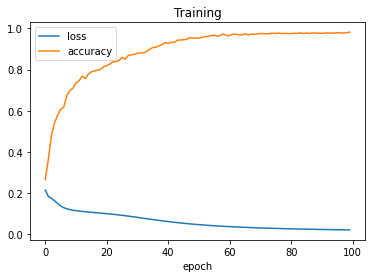

In [36]:
PlotHistory(trainedRN.history)

In [37]:
# criando a matriz de confusão:
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)

pd.DataFrame(y_test_predicted).head()

,0,1,2,3
0,0.000008,0.005450,0.166413,8.798989e-01
1,0.977219,0.042724,0.001339,4.783295e-07
2,0.000157,0.148073,0.805168,7.273406e-03
3,0.000387,0.321364,0.652545,3.333330e-03
4,0.000020,0.009663,0.431642,5.606343e-01


In [43]:

y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = np.array(y_test)
pd.DataFrame(y_test_predicted_indexes).head()

,0
0,3
1,0
2,2
3,2
4,3


In [45]:
confMatrix = pd.DataFrame(confusion_matrix(y_test_predicted_indexes, y_test_indexes), 
                                           index=['0', '1','2','3'], columns=['0', '1', '2', '3'],) #matriz de confusão
confMatrix.index.name = 'Actual'
confMatrix.columns.name = 'Predicted'
pd.DataFrame(confMatrix).head()

Predicted,0,1,2,3
Actual,,,,
0,149,7,0,0
1,2,125,3,0
2,0,3,143,1
3,0,0,5,162
